# Notebook with example for simulating the Less-than Oracle

In [18]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
import numpy as np

import Oracles as func
from importlib import reload
reload(func)

<module 'Oracles' from '/teamspace/studios/this_studio/K-coloring-range-Oracles/Oracles.py'>

Initial data

In [19]:
number = 2
nqubits = 2

In [20]:
circuit = QuantumCircuit(nqubits)

In [21]:
circuit.h(range(nqubits))

In [22]:
oracle = func.my_oracle_greater_than(number=number, nqubits=nqubits)

flipping at position %d  1


In [23]:
circuit.append(oracle, range(nqubits))

Diffuser for Grover's Algorithm

In [24]:
diffuser = QuantumCircuit(nqubits, name=' Diffuser ')

diffuser.h(range(nqubits))
diffuser.x(range(nqubits))
diffuser.append(func.multi_control_z(nqubits), range(nqubits))
diffuser.x(range(nqubits))
diffuser.h(range(nqubits))

In [25]:
circuit.append(diffuser, range(nqubits))

Add measures

In [26]:
circuit.measure_all()

# Draw of Circuits

### By Modules

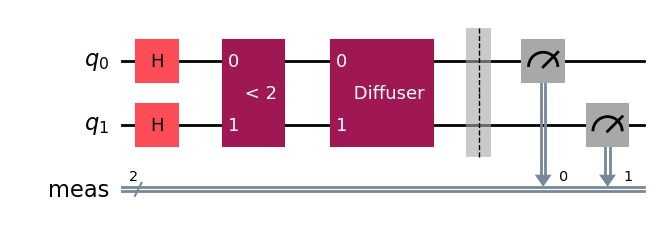

In [27]:
circuit.draw(output='mpl')

### Decomposed

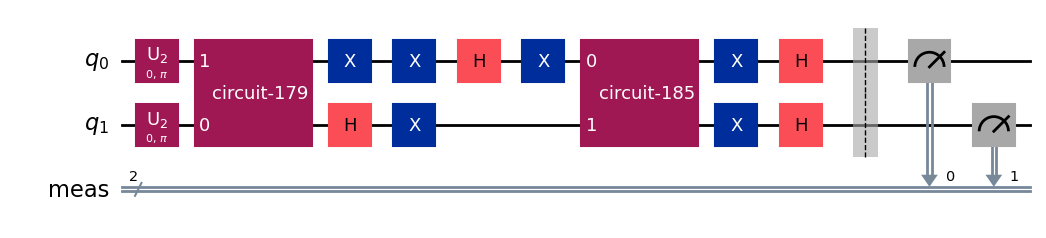

In [28]:
circuit.decompose().draw(output='mpl')

# Simulation of circuit

In [29]:
nshots = 2000

Choose Backend

In [30]:
backend = Aer.get_backend('aer_simulator_statevector')

Transpile and execute circuit

In [31]:
qc_transpiled=transpile(circuit, backend=backend)

In [32]:
job= backend.run(qc_transpiled, shots=nshots, memory=True)

Results

In [33]:
result = job.result()

In [34]:
counts = result.get_counts()

sorted_counts = dict(sorted(counts.items(), key=lambda item: int(item[0], 2)))
print("\nMeasurement outcomes:")
for state, count in sorted_counts.items():
    decimal_value = int(state, 2)  # Convert binary string to decimal
    print(f"{decimal_value}:{state} → {count}")


Measurement outcomes:
3:11 → 2000
